In [1]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def show_image(ax, image, title='image', cmap=None):
    if len(image.shape) == 3:
        image = image[:, :, ::-1]
    ax.imshow(image, cmap=cmap)
    ax.set_title(title)

In [3]:
def show_image_with_mask(ax, image, min_vals, max_vals, title='image'):
    mask = cv2.inRange(image, min_vals, max_vals)
    image = cv2.bitwise_and(image, image, mask=mask)
    show_image(ax, image, title)

In [4]:
def show_image_hist(ax, image, title='hist', xlabel='x', ylabel='y'):
    ax.hist(image.ravel()[image.ravel() > 1], 256, [0, 256])
    ax.set_xlabel(title)
    ax.set_ylabel(xlabel)
    ax.set_title(ylabel)

In [5]:
thresh = 40

In [6]:
# BGR
brightBGR = cv2.imread('data/LB1/6.jpg')
darkBGR = cv2.imread('data/LB1/7.jpg')

bgr = np.array([40, 158, 16])

minBGR = np.array([bgr[0] - thresh, bgr[1] - thresh, bgr[2] - thresh])
maxBGR = np.array([bgr[0] + thresh, bgr[1] + thresh, bgr[2] + thresh])

In [7]:
# HSV
brightLAB = cv2.cvtColor(brightBGR, cv2.COLOR_BGR2LAB)
darkLAB = cv2.cvtColor(darkBGR, cv2.COLOR_BGR2LAB)

hsv = cv2.cvtColor(np.uint8([[bgr]]), cv2.COLOR_BGR2HSV)[0][0]

minHSV = np.array([hsv[0] - thresh, hsv[1] - thresh, hsv[2] - thresh])
maxHSV = np.array([hsv[0] + thresh, hsv[1] + thresh, hsv[2] + thresh])

In [8]:
# YCB
brightYCB = cv2.cvtColor(brightBGR, cv2.COLOR_BGR2YCrCb)
darkYCB = cv2.cvtColor(darkBGR, cv2.COLOR_BGR2YCrCb)

ycb = cv2.cvtColor(np.uint8([[bgr]]), cv2.COLOR_BGR2YCrCb)[0][0]

minYCB = np.array([ycb[0] - thresh, ycb[1] - thresh, ycb[2] - thresh])
maxYCB = np.array([ycb[0] + thresh, ycb[1] + thresh, ycb[2] + thresh])

In [9]:
# LAB
brightHSV = cv2.cvtColor(brightBGR, cv2.COLOR_BGR2HSV)
darkHSV = cv2.cvtColor(darkBGR, cv2.COLOR_BGR2HSV)

lab = cv2.cvtColor(np.uint8([[bgr]]), cv2.COLOR_BGR2LAB)[0][0]

minLAB = np.array([lab[0] - thresh, lab[1] - thresh, lab[2] - thresh])
maxLAB = np.array([lab[0] + thresh, lab[1] + thresh, lab[2] + thresh])

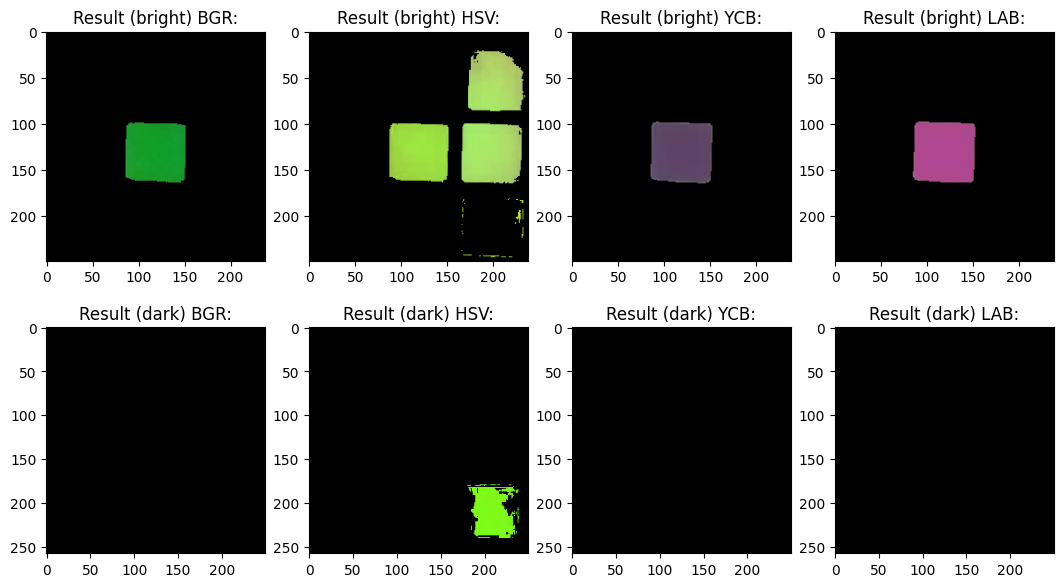

In [10]:
_, ((ax11, ax12, ax13, ax14), (ax21, ax22, ax23, ax24)) = plt.subplots(2, 4, figsize=(13, 7))

show_image_with_mask(ax11, brightBGR, minBGR, maxBGR, "Result (bright) BGR:")
show_image_with_mask(ax12, brightHSV, minHSV, maxHSV, "Result (bright) HSV:")
show_image_with_mask(ax13, brightYCB, minYCB, maxYCB, "Result (bright) YCB:")
show_image_with_mask(ax14, brightLAB, minLAB, maxLAB, "Result (bright) LAB:")

show_image_with_mask(ax21, darkBGR, minBGR, maxBGR, "Result (dark) BGR:")
show_image_with_mask(ax22, darkHSV, minHSV, maxHSV, "Result (dark) HSV:")
show_image_with_mask(ax23, darkYCB, minYCB, maxYCB, "Result (dark) YCB:")
show_image_with_mask(ax24, darkLAB, minLAB, maxLAB, "Result (dark) LAB:")

plt.show()

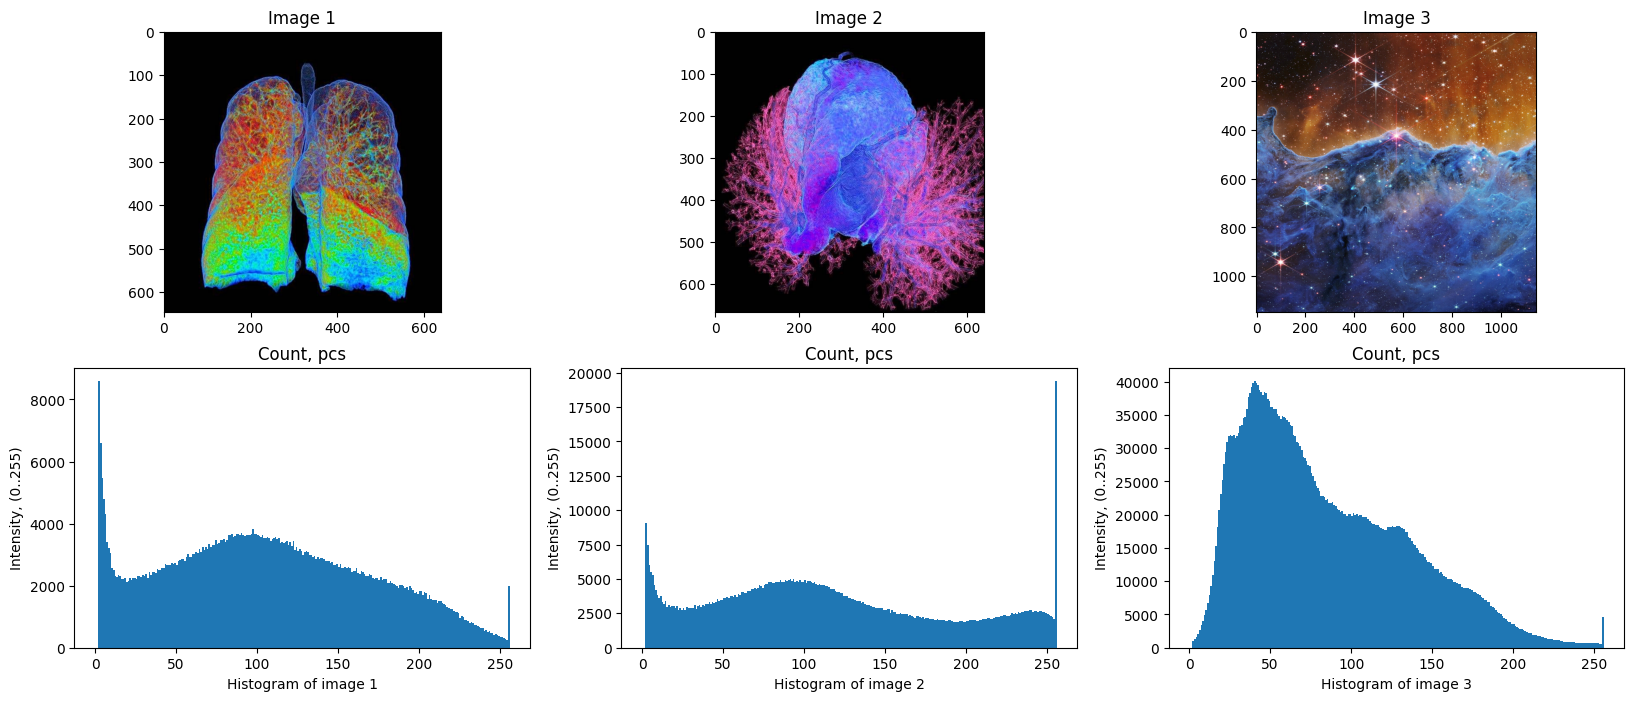

In [11]:
img1 = cv2.imread('data/LB1/2.jpg', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('data/LB1/16.jpg', cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3 = cv2.imread('data/LB1/3.jpg', cv2.IMREAD_COLOR)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

_, ((ax11, ax12, ax13), (ax21, ax22, ax23)) = plt.subplots(2, 3, figsize=(20, 8))

show_image(ax11, img1, 'Image 1')
show_image(ax12, img2, 'Image 2')
show_image(ax13, img3, 'Image 3')

show_image_hist(ax21, img1, title='Histogram of image 1', xlabel='Intensity, (0..255)', ylabel='Count, pcs')
show_image_hist(ax22, img2, title='Histogram of image 2', xlabel='Intensity, (0..255)', ylabel='Count, pcs')
show_image_hist(ax23, img3, title='Histogram of image 3', xlabel='Intensity, (0..255)', ylabel='Count, pcs')

plt.show()

In [12]:
from skimage.filters import median, gaussian
from skimage.morphology import disk
from skimage.util import random_noise
from skimage.transform import rescale

img1 = cv2.imread('data/LB1/2.jpg', cv2.IMREAD_GRAYSCALE)
img1 = rescale(img1, 0.15)

img_ns = random_noise(img1, mode='speckle', mean=0.1)

# Median filter
img_m3 = median(img_ns, disk(3))
img_m9 = median(img_ns, disk(9))

# Gaussian filter
img_g1 = gaussian(img_ns, 1)
img_g3 = gaussian(img_ns, 3)

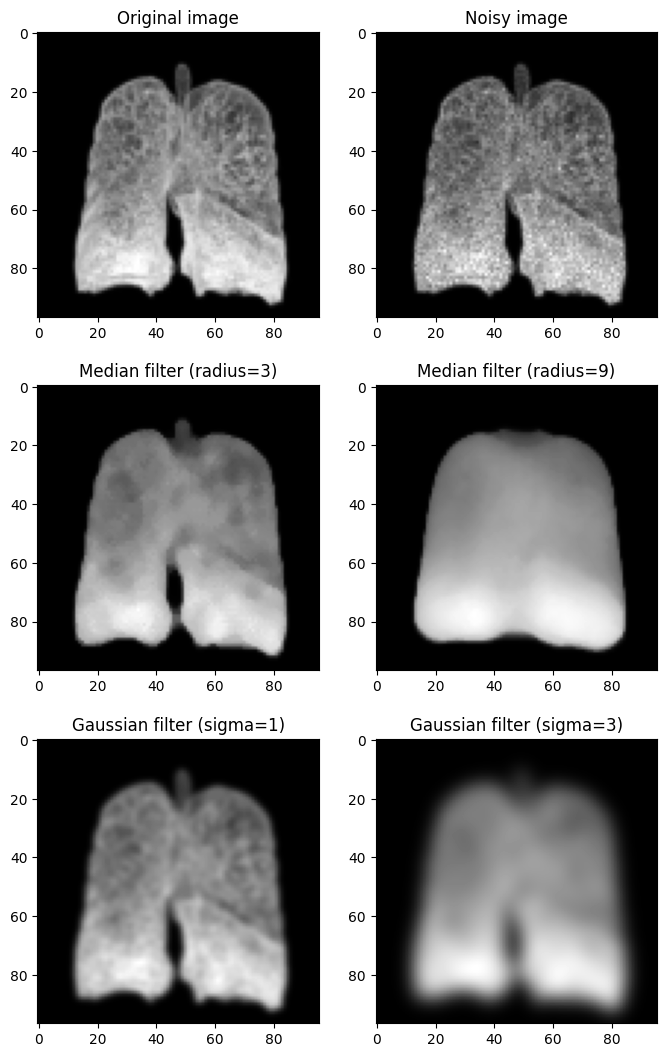

In [13]:
_, ((ax11, ax12), (ax21, ax22), (ax31, ax32)) = plt.subplots(3, 2, figsize=(8, 13))

show_image(ax11, img1, title='Original image', cmap='gray')
show_image(ax12, img_ns, title='Noisy image', cmap='gray')
show_image(ax21, img_m3, title='Median filter (radius=3)', cmap='gray')
show_image(ax22, img_m9, title='Median filter (radius=9)', cmap='gray')
show_image(ax31, img_g1, title='Gaussian filter (sigma=1)', cmap='gray')
show_image(ax32, img_g3, title='Gaussian filter (sigma=3)', cmap='gray')

plt.show()